Estimate the upper bound of the rank

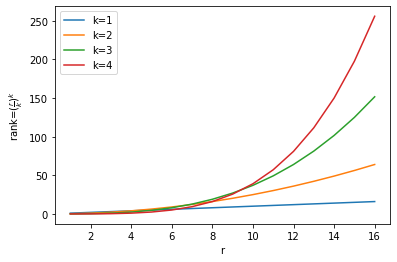

In [3]:
import matplotlib.pyplot as plt

# Define values for r
r_values = range(1, 17)

# Define values for k
k_values = range(1, 5)

# Loop through k values and plot (r/k)^k for each value
for k in k_values:
    y_values = [(r / k) ** k for r in r_values]
    plt.plot(r_values, y_values, label=f"k={k}")

# Add labels and legend to the plot
plt.xlabel("r")
plt.ylabel("rank=$(\\frac{r}{k})^k$")
plt.legend()

# Show the plot
plt.show()


Experiment on the method

In [139]:
# change the identity matrix A=np.eye(3), to be a matrix contains k A in a row
A = np.eye(3)
A = np.vstack([A] * k).T
A


array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]])

In [161]:
import numpy as np
import matplotlib.pyplot as plt

def estimator(type = 'h', m_rows = 768, n_rows=1024, r=16, k=4, regularization=False):
    if type == 'a':
        assert(m_rows % r == 0 and n_rows % r==0)
        I = np.eye(r)
        Iu = np.vstack([I] * (n_rows // r)).T
        Iv = np.vstack([I] * (m_rows // r))

        print(f"trainable: {(m_rows+n_rows)*r}, partion: {(m_rows+n_rows)*r/(m_rows * n_rows)}")
        est = min(m_rows, n_rows, 2*r)
        print(f"r = {r}, estimate rank of delta: {est}")
    else:
        assert(r % k == 0)
        rr = r // k
        print(f"trainable: {(m_rows+n_rows)*r}, partion: {(m_rows+n_rows)*r/(m_rows * n_rows)}")
        est = min(m_rows, n_rows, rr**k)
        print(f"r={r},k={k}, regularization:{regularization}, estimate rank of delta: {est}")
    
    # Initialize an array to store the rank of each matrix
    ranks = np.zeros(100)
    
    def a_lora():
        U = np.random.normal(size=(m_rows, r))
        V = np.random.normal(size=(n_rows, r))
        W = U.dot(Iu) + Iv.dot(V.T)
        return np.linalg.matrix_rank(W)
    
    def h_lora():
        # Generate the Wi matrices
        U = np.random.normal(size=(m_rows, r))
        V = np.random.normal(size=(n_rows, r))
        # Computer W
        for j in range(k):
            Wi = U[:, j * rr : (j+1) * rr].dot(V[:, j * rr : (j+1) * rr].T)
            if regularization:
                Wi = np.tanh(Wi)
            if j==0:
                W = Wi
            else:
                W *= Wi
        # Compute the rank of the W matrix
        return np.linalg.matrix_rank(W)

    # Run the experiments
    for i in range(100):
        if type == 'a':
            ranks[i] = a_lora()
        else:
            ranks[i] = h_lora()

    # Display the histogram of ranks
    plt.hist(ranks,bins=range(1, 1+min(m_rows, n_rows)), density=True)
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.show()

trainable: 4000, partion: 0.4
r = 20, estimate rank of delta: 40


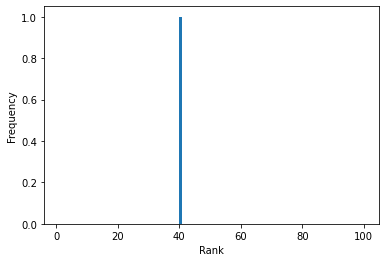

In [163]:
estimator(type = 'a', m_rows = 100, n_rows=100, r=20, regularization=False)

trainable: 28672, partion: 0.036458333333333336
r=16,k=4, regularization:Trueestimate rank of delta: 256


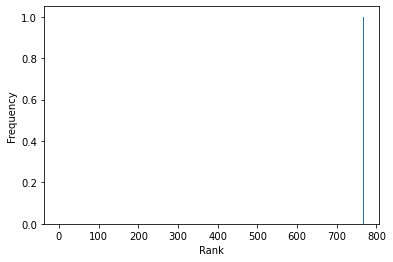

In [158]:
estimator(regularization=True)

trainable: 2000, partion: 0.2
r=10,k=1, regularization:Falseestimate rank of delta: 10


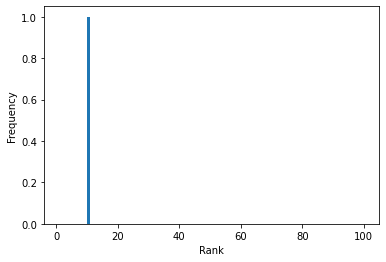

trainable: 600, partion: 0.06
r=3,k=1, regularization:Trueestimate rank of delta: 3


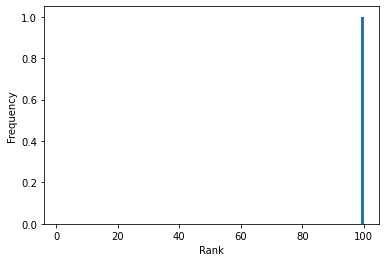

In [95]:
estimator(m_rows = 100, n_rows=100, r=10, k=1, regularization=False)
estimator(m_rows = 100, n_rows=100, r=3, k=1, regularization=True)